# MINI PROJECT: GDP analysis - BRICS countries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
# Read file
#dataset = pd.read_csv('Indicators/Indicators.csv',sep=',')
dataset = pd.read_csv('./data/Indicators.csv',sep=',')
print(dataset.shape)

(5656458, 6)


In [4]:
dataset.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
len(dataset['CountryCode'].unique().tolist())

247

In [6]:
len(dataset['IndicatorName'].unique().tolist())

1344

In [7]:
dataset['Year'].min() , dataset['Year'].max()

(1960, 2015)

In [8]:
dataset['Value'].isnull().any()

False

In [9]:
# checking missing values
dataset.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

# Identifying the Indicator for analysis

In [10]:
IndicatorList = dataset['IndicatorName'].unique().tolist()
#IndicatorList

In [11]:
# Indicator list with "constanct 2005 US$"
IndicatorList = dataset[dataset['IndicatorName'].str.contains('constant 2005 US')]['IndicatorName'].unique().tolist()

In [12]:
df = dataset[dataset['IndicatorName'].isin(IndicatorList)]
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
232,East Asia & Pacific (all income levels),EAS,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1960,1.241655e+11
261,East Asia & Pacific (all income levels),EAS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,1.023739e+12
263,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9.820268e+02
266,East Asia & Pacific (all income levels),EAS,General government final consumption expenditu...,NE.CON.GOVT.KD,1960,2.048411e+11
268,East Asia & Pacific (all income levels),EAS,GNI (constant 2005 US$),NY.GNP.MKTP.KD,1960,9.926553e+11


In [13]:
dfSummary = df.groupby('IndicatorName')

In [14]:
aggYear = dfSummary['Year'].agg(['min','max'])
aggYear.columns = ['minYear','maxYear']
aggValue = dfSummary['Value'].agg(['min','max','std'])
aggValue.columns = ['minValue','maxValue','STDValue']

aggYear.shape
#aggValue.shape
#print(aggYear)
#print(aggValue)
aggdataset = aggYear.merge(aggValue, on = 'IndicatorName', how='inner')
aggdataset.shape
aggdataset.head()

,minYear,maxYear,minValue,maxValue,STDValue
IndicatorName,,,,,
Adjusted net national income (constant 2005 US$),1970,2013,-5.176428e+08,4.637541e+13,4.801916e+12
Adjusted net national income per capita (constant 2005 US$),1970,2013,-1.436064e+02,6.224858e+04,1.027457e+04
Agriculture value added per worker (constant 2005 US$),1980,2014,8.130222e+01,1.660676e+05,1.302128e+04
"Agriculture, value added (constant 2005 US$)",1960,2014,0.000000e+00,1.912546e+12,1.436454e+11
Exports of goods and services (constant 2005 US$),1960,2014,1.136172e+07,1.903094e+13,1.288376e+12


In [15]:
# create csv file
aggdataset.to_csv('./data/GDPIndicatorsList.csv',sep =',')

# Reserach Qs : 
What indicators contribute more to the GDP of a country? 
For emerging economic countries (BRICs), how does the trend change over time due to globalization and development? 
Which country and sectors are the safest bet to invest for a higher return?
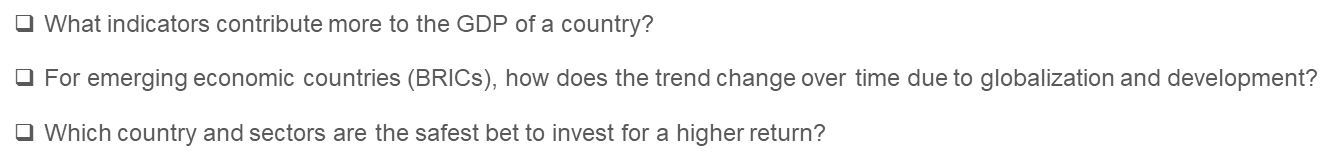

In [16]:
dataset.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [17]:
dataset[dataset['IndicatorName'].str.contains('GDP at market prices \(constant')].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
261,East Asia & Pacific (all income levels),EAS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,1.023739e+12
374,East Asia & Pacific (developing only),EAP,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,1.511493e+11
515,Euro area,EMU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,2.491733e+12
621,Europe & Central Asia (all income levels),ECS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,4.370695e+12
833,European Union,EUU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,3.684449e+12


# Visualize the latest GDP of all countries

In [18]:
import folium

In [19]:
country_geo='geo/world-countries.json'
country_geo

'geo/world-countries.json'

In [20]:
dataset.head()
data = dataset[dataset['IndicatorName'].str.contains('GDP at market prices \(constant 2005')]
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
261,East Asia & Pacific (all income levels),EAS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,1.023739e+12
374,East Asia & Pacific (developing only),EAP,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,1.511493e+11
515,Euro area,EMU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,2.491733e+12
621,Europe & Central Asia (all income levels),ECS,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,4.370695e+12
833,European Union,EUU,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1960,3.684449e+12


In [21]:
data2014 = data[data['Year']==2014]
data2015 = data[data['Year']==2015]

In [22]:
len(data2014['CountryCode'].unique()),len(data2015['CountryCode'].unique())

(212, 0)

In [23]:
plot_data = data2014[['CountryCode','Value']]
plot_data.head()

,CountryCode,Value
5534375,ARB,1.752424e+12
5534626,CSS,5.231312e+10
5534885,CEB,1.101409e+12
5535232,EAS,1.463782e+13
5535533,EAP,6.574944e+12


In [24]:
plot_data['NewValue']=plot_data.iloc[:,1]/10e11

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
plot_data.head()

,CountryCode,Value,NewValue
5534375,ARB,1.752424e+12,1.752424
5534626,CSS,5.231312e+10,0.052313
5534885,CEB,1.101409e+12,1.101409
5535232,EAS,1.463782e+13,14.637816
5535533,EAP,6.574944e+12,6.574944


In [26]:
plot_data['NewValue'].min(),plot_data['NewValue'].max()

(2.67283029818605e-05, 58.1483616982774)

In [27]:
plot_indicator = data2014['IndicatorName'].iloc[0]
plot_indicator

'GDP at market prices (constant 2005 US$)'

In [28]:
#world_geo = os.path.join('C:/Users/ajamishr/Documents/Python/geo', 'world-countries.json')
world_geo = os.path.join('./data', 'world-countries.json')
world_geo

'./data\\world-countries.json'

In [29]:
#map = folium.Map(location=[45.5236, -122.6750], zoom_start=1.5)
map = folium.Map(location=[100, 0], zoom_start=2)

In [30]:
map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=plot_data,
    columns=['CountryCode', 'NewValue'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.9,
    legend_name='GDP value of a country in 10e11'
)

# BRICS markers
folium.Marker([-10, -55], popup='Brazil',icon=folium.Icon(color='blue')).add_to(map)
folium.Marker([60, 100], popup='Russia',icon=folium.Icon(color='red')).add_to(map)
folium.Marker([20, 77], popup='India', icon=folium.Icon(color='orange')).add_to(map)
folium.Marker([35, 105], popup='China',icon=folium.Icon(color='green')).add_to(map)
folium.Marker([-29, 24], popup='South Africa',icon=folium.Icon(color='gray')).add_to(map)

In [31]:
map.save('GDPWorld.html')

BRICs Countries - GDP and Trend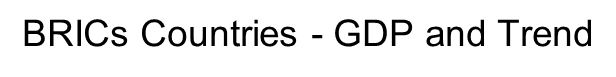

In [32]:
IndicatorFilter1 = 'GDP at market prices \(constant 2005'

In [33]:
# Year filters
#stage1['Year'].unique().tolist()
#YearFilter = [1960,1970,1980,1990,2000,2010,2014]
YearFilter = [1980,1990,2000,2010,2014]

In [34]:
YearFilter

[1980, 1990, 2000, 2010, 2014]

In [35]:
# BRICS countries
CountryFilter = ['BRA','RUS','IND','CHN','ZAF']
print(type(CountryFilter))
CountryFilter

<class 'list'>


['BRA', 'RUS', 'IND', 'CHN', 'ZAF']

In [36]:
mask1 = dataset['IndicatorName'].str.contains(IndicatorFilter1)

In [37]:
mask2 = dataset['Year'].isin(YearFilter)

In [38]:
mask3 = dataset['CountryCode'].isin(CountryFilter)

In [39]:
df1 = dataset[mask1 & mask2 & mask3]

In [40]:
df1.shape

(24, 6)

# Indicator I: Manufacturing, value added (constant 2005 US$)

In [41]:
IndicatorFilter2 = 'Manufacturing, value added \(constant 2005'#  #'Agriculture, value added \(%'   #'Foreign direct investment'
mask4 = dataset['IndicatorName'].str.contains(IndicatorFilter2)
df2 = dataset[mask4 & mask2 & mask3]

In [42]:
df2.shape
print(df2['CountryCode'].unique())
print(df2['Year'].unique())
df2.head(5)

['CHN' 'IND' 'ZAF' 'BRA']
[1980 1990 2000 2010 2014]


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1034757,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,6.138411e+10
1051638,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,2.629798e+10
1080022,South Africa,ZAF,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,2.786125e+10
1907585,Brazil,BRA,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1990,1.105292e+11
1914989,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1990,1.528899e+11


In [43]:
df2[df2['CountryCode']=='IND']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1051638,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,2.629798e+10
1937892,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1990,4.800201e+10
3245935,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,2000,8.574991e+10
4929685,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,2010,1.860849e+11
5585488,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,2014,2.382549e+11


# Indicator II: Agriculture, value added (constant 2005 US$)

In [44]:
IndicatorFilter3 ='Agriculture, value added \(constant 2005 '# 'Exports of goods and services \(constant 2005'
#IndicatorFilter2 ='Services, etc., value added \(constant 2005'# US$)
#'Manufacturing, value added \(constant 2005'#  #'Agriculture, value added \(%'   #'Foreign direct investment'
mask5 = dataset['IndicatorName'].str.contains(IndicatorFilter3)
df3 = dataset[mask5 & mask2 & mask3]

In [45]:
df3.shape
print(df3['CountryCode'].unique())
print(df3['Year'].unique())
df3.head(5)

['BRA' 'CHN' 'IND' 'ZAF' 'RUS']
[1980 1990 2000 2010 2014]


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1029540,Brazil,BRA,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1980,1.876805e+10
1034560,China,CHN,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1980,8.400877e+10
1051355,India,IND,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1980,6.906304e+10
1079810,South Africa,ZAF,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1980,4.445439e+09
1907217,Brazil,BRA,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1990,2.406863e+10


# Indicator III: Services, etc., value added (constant 2005 US$)

In [46]:
IndicatorFilter4 ='Services, etc., value added \(constant 2005'# US$)
#'Manufacturing, value added \(constant 2005'#  #'Agriculture, value added \(%'   #'Foreign direct investment'
mask6 = dataset['IndicatorName'].str.contains(IndicatorFilter4)
df4 = dataset[mask6 & mask2 & mask3]

In [47]:
df4.shape
print(df4['CountryCode'].unique())
print(df4['Year'].unique())
df4.head(5)

['CHN' 'IND' 'ZAF' 'RUS' 'BRA']
[1980 1990 2000 2010 2014]


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1034876,China,CHN,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1980,6.754895e+10
1051875,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1980,7.173092e+10
1080113,South Africa,ZAF,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1980,8.581488e+10
1915296,China,CHN,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1990,2.146332e+11
1938187,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1990,1.342344e+11


In [48]:
print(IndicatorFilter1)
print(IndicatorFilter2)
print(IndicatorFilter3)
print(IndicatorFilter4)

GDP at market prices \(constant 2005
Manufacturing, value added \(constant 2005
Agriculture, value added \(constant 2005 
Services, etc., value added \(constant 2005


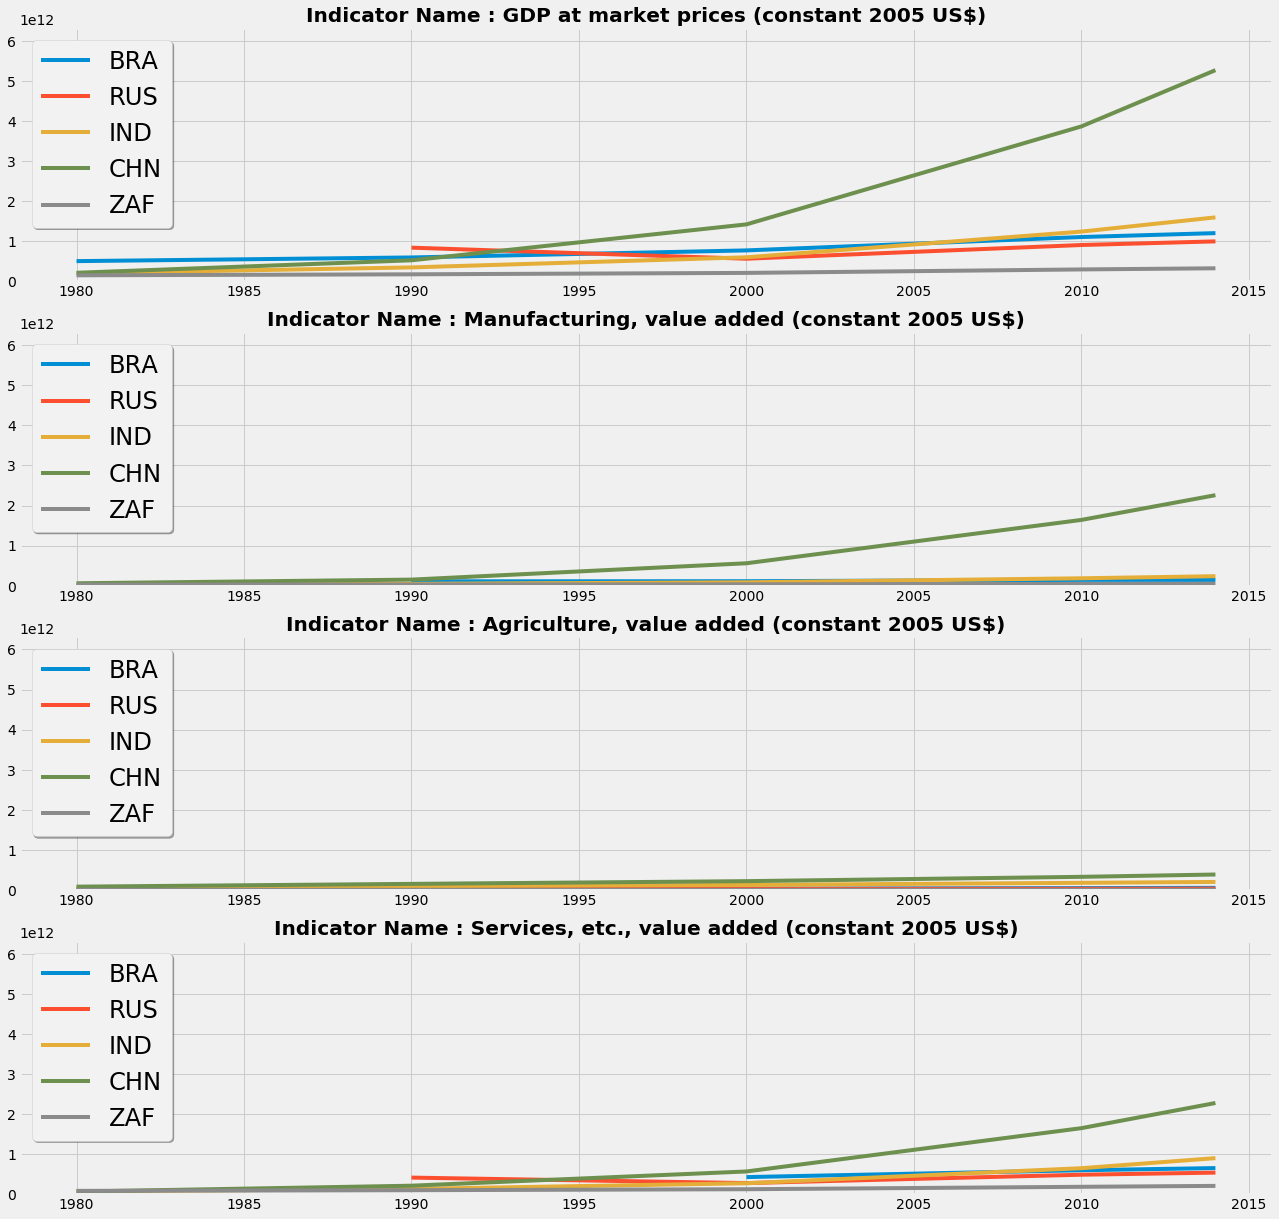

In [49]:
# 4 plots
from matplotlib import gridspec

plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

fig = plt.figure(figsize=(20, 20)) 
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
gs = gridspec.GridSpec(4, 1)#, width_ratios=[1, 1]) 

ax0 = plt.subplot(gs[0,:])
### Plot 1 "GDP at market prices (constant 2005 US$)"
ax0.set_ylim(min(0,df1['Value'].min()), 1.2*df1['Value'].max())
ax0.set_title('Indicator Name : ' + df1['IndicatorName'].values[0],fontweight="bold")

for i in CountryFilter:
    CCode = i
    X=df1[df1['CountryCode'].str.contains(CCode)]['Year']
    Y=df1[df1['CountryCode'].str.contains(CCode)]['Value']
    ax0.plot(X, Y, '-',label=CCode)


# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
#plt.show()

# Plot 2 "Manufacturing, value added (constant 2005 US$)"

ax1 = plt.subplot(gs[1,:])

ax1.set_ylim(min(0,df1['Value'].min()), 1.2*df1['Value'].max())
#ax1.set_ylim(min(0,df2['Value'].min()), 1.2*df2['Value'].max()) # keeping same as above
#ax1.set_ylim(0, 4.5) # keeping same as above
ax1.set_title('Indicator Name : ' + df2['IndicatorName'].values[0],fontweight="bold")

for i in CountryFilter:
    CCode = i
    X=df2[df2['CountryCode'].str.contains(CCode)]['Year']
    Y=df2[df2['CountryCode'].str.contains(CCode)]['Value']
    ax1.plot(X, Y, '-',label=CCode)

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')    

# Add the legend
#legend = plt.legend(loc = 'upper left', 
#                    shadow=True,
#                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
#frame = legend.get_frame()
#frame.set_facecolor('.95')

#Plot 3 "Agriculture, value added (constant 2005 US$)"
ax2 = plt.subplot(gs[2,:])

### plot 3
#ax2.set_ylim(min(0,df3['Value'].min()), 1.2*df3['Value'].max()) # keeping same as above
#ax2.set_ylim(min(0,df2['Value'].min()), 1.2*df2['Value'].max()) # keeping same as above
ax2.set_ylim(min(0,df1['Value'].min()), 1.2*df1['Value'].max())
ax2.set_title('Indicator Name : ' + df3['IndicatorName'].values[0],fontweight="bold")

for i in CountryFilter:
    CCode = i
    X=df3[df3['CountryCode'].str.contains(CCode)]['Year']
    Y=df3[df3['CountryCode'].str.contains(CCode)]['Value']
    ax2.plot(X, Y, '-',label=CCode)

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
    
#Plot 4 "Services, etc., value added (constant 2005 US$)"
ax3 = plt.subplot(gs[3,:])

### plot 3
#ax3.set_ylim(min(0,df4['Value'].min()), 1.2*df4['Value'].max()) # keeping same as above
ax3.set_ylim(min(0,df1['Value'].min()), 1.2*df1['Value'].max())
ax3.set_title('Indicator Name : ' + df4['IndicatorName'].values[0],fontweight="bold")

for i in CountryFilter:
    CCode = i
    X=df4[df4['CountryCode'].str.contains(CCode)]['Year']
    Y=df4[df4['CountryCode'].str.contains(CCode)]['Value']
    ax3.plot(X, Y, '-',label=CCode)
    
# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()


#plt.tight_layout()
#plt.savefig('GDP.png')
fig.savefig("GDPTrend.png")

# scatter plot and correlation - GDP against MFG, Agri and Services

In [50]:

dataGDP = dataset[dataset['IndicatorName'].str.contains('GDP at market prices \(constant')]
dataMFG = dataset[dataset['IndicatorName'].str.contains('Manufacturing, value added \(constant 2005')]

dataAGRI = dataset[dataset['IndicatorName'].str.contains('Agriculture, value added \(constant 2005')]
dataSERV = dataset[dataset['IndicatorName'].str.contains('Services, etc., value added \(constant 2005')]

In [51]:
dataGDP.shape, dataMFG.shape, dataAGRI.shape,dataSERV.shape

((9954, 6), (6509, 6), (7233, 6), (6918, 6))

In [52]:
print(dataGDP['IndicatorName'].head(1))
print(dataMFG['IndicatorName'].head(1))
print(dataAGRI['IndicatorName'].head(1))
print(dataSERV['IndicatorName'].head(1))

261    GDP at market prices (constant 2005 US$)
Name: IndicatorName, dtype: object
2017    Manufacturing, value added (constant 2005 US$)
Name: IndicatorName, dtype: object
232    Agriculture, value added (constant 2005 US$)
Name: IndicatorName, dtype: object
466    Services, etc., value added (constant 2005 US$)
Name: IndicatorName, dtype: object


# Comparing the GDP Vs MFG for China and India

In [53]:
# selected Countries: China and India
Country1 = CountryFilter[3]
Country2 = CountryFilter[2]
Country1,Country2

('CHN', 'IND')

In [54]:

dataGDPCR1 = dataGDP[dataGDP['CountryCode'].str.contains(Country1)]
dataGDPCR2 = dataGDP[dataGDP['CountryCode'].str.contains(Country2)]

dataMFGCR1 = dataMFG[dataMFG['CountryCode'].str.contains(Country1)]
dataMFGCR2 = dataMFG[dataMFG['CountryCode'].str.contains(Country2)]

dataAGRICR1 = dataAGRI[dataAGRI['CountryCode'].str.contains(Country1)]
dataAGRICR2 = dataAGRI[dataAGRI['CountryCode'].str.contains(Country2)]

dataSERVCR1 = dataSERV[dataSERV['CountryCode'].str.contains(Country1)]
dataSERVCR2 = dataSERV[dataSERV['CountryCode'].str.contains(Country2)]

In [55]:
dataMFGCR2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11686,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1960,1.065698e+10
36639,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1961,1.156703e+10
64183,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1962,1.240904e+10
92629,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1963,1.358275e+10
121426,India,IND,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1964,1.452197e+10


In [56]:
print('===> GDP Vs MFG')
print('Country I')
print(dataGDPCR1.shape)
print(dataMFGCR1.shape)
print('Country II')
print(dataGDPCR2.shape)
print(dataMFGCR2.shape)

print('===> GDP Vs AGRI')
print(dataGDPCR1.shape)
print(dataAGRICR1.shape)
print('Country I')
print(dataGDPCR2.shape)
print(dataAGRICR2.shape)
print('Country II')

print('===> GDP Vs SERV')
print('Country I')
print(dataGDPCR1.shape)
print(dataSERVCR1.shape)
print('Country II')
print(dataGDPCR2.shape)
print(dataSERVCR2.shape)

===> GDP Vs MFG
Country I
(55, 6)
(37, 6)
Country II
(55, 6)
(55, 6)
===> GDP Vs AGRI
(55, 6)
(55, 6)
Country I
(55, 6)
(55, 6)
Country II
===> GDP Vs SERV
Country I
(55, 6)
(55, 6)
Country II
(55, 6)
(55, 6)


In [57]:
print('********************************   '+ Country1 +'   *******************************')
print('GDP'+'  '+'MFG'+'  '+'AGRI'+'  '+'SERV')
print(dataGDPCR1['Year'].min(),dataMFGCR1['Year'].min(),dataAGRICR1['Year'].min(),dataSERVCR1['Year'].min())
print(dataGDPCR1['Year'].max(),dataMFGCR1['Year'].max(),dataAGRICR1['Year'].max(),dataSERVCR1['Year'].max())

********************************   CHN   *******************************
GDP  MFG  AGRI  SERV
1960 1978 1960 1960
2014 2014 2014 2014


In [58]:
print('********************************   '+ Country2 +'   *******************************')
print('GDP'+'  '+'MFG'+'  '+'AGRI'+'  '+'SERV')
print(dataGDPCR2['Year'].min(),dataMFGCR2['Year'].min(),dataAGRICR2['Year'].min(),dataSERVCR2['Year'].min())
print(dataGDPCR2['Year'].max(),dataMFGCR2['Year'].max(),dataAGRICR2['Year'].max(),dataSERVCR2['Year'].max())

********************************   IND   *******************************
GDP  MFG  AGRI  SERV
1960 1960 1960 1960
2014 2014 2014 2014


In [59]:
dataGDPCR1_temp = dataGDPCR1[dataGDPCR1['Year'] >= 1978]
dataGDPCR2_temp = dataGDPCR2[dataGDPCR2['Year'] >= 1978]

dataMFGCR1_temp = dataMFGCR1[dataMFGCR1['Year'] >= 1978]
dataMFGCR2_temp = dataMFGCR2[dataMFGCR2['Year'] >= 1978]

dataAGRICR1_temp = dataAGRICR1[dataAGRICR1['Year'] >= 1978]
dataAGRICR2_temp = dataAGRICR2[dataAGRICR2['Year'] >= 1978]

dataSERVCR1_temp = dataSERVCR1[dataSERVCR1['Year'] >= 1978]
dataSERVCR2_temp = dataSERVCR2[dataSERVCR2['Year'] >= 1978]

In [60]:
print(dataGDPCR1_temp.shape, dataGDPCR2_temp.shape,dataMFGCR1_temp.shape,  dataMFGCR2_temp.shape,dataAGRICR1_temp.shape, dataAGRICR2_temp.shape, dataSERVCR1_temp.shape, dataSERVCR2_temp.shape)

(37, 6) (37, 6) (37, 6) (37, 6) (37, 6) (37, 6) (37, 6) (37, 6)


In [61]:
print(dataGDPCR1_temp['Year'].min(),dataGDPCR2_temp['Year'].min())
print(dataMFGCR1_temp['Year'].max(),dataMFGCR2_temp['Year'].max())

1978 1978
2014 2014


In [62]:
print('********************************   '+ Country1 +'   *******************************')
print('GDP'+'  '+'MFG'+'  '+'AGRI'+'  '+'SERV')
print(dataGDPCR1_temp['Year'].min(),dataMFGCR1_temp['Year'].min(),dataAGRICR1_temp['Year'].min(),dataSERVCR1_temp['Year'].min())
print(dataGDPCR1_temp['Year'].max(),dataMFGCR1_temp['Year'].max(),dataAGRICR1_temp['Year'].max(),dataSERVCR1_temp['Year'].max())

********************************   CHN   *******************************
GDP  MFG  AGRI  SERV
1978 1978 1978 1978
2014 2014 2014 2014


In [63]:
print('********************************   '+ Country2 +'   *******************************')
print('GDP'+'  '+'MFG'+'  '+'AGRI'+'  '+'SERV')
print(dataGDPCR2_temp['Year'].min(),dataMFGCR2_temp['Year'].min(),dataAGRICR2_temp['Year'].min(),dataSERVCR2_temp['Year'].min())
print(dataGDPCR2_temp['Year'].max(),dataMFGCR2_temp['Year'].max(),dataAGRICR2_temp['Year'].max(),dataSERVCR2_temp['Year'].max())

********************************   IND   *******************************
GDP  MFG  AGRI  SERV
1978 1978 1978 1978
2014 2014 2014 2014


In [64]:
len(dataGDPCR1_temp['Value'].values), len(dataMFGCR1_temp['Value'].values)

(37, 37)

In [65]:
#dataGDPCR1_temp.head()
dataMFGCR1_temp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
881413,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1978,5.014631e+10
957156,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1979,5.450904e+10
1034757,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,6.138411e+10
1117300,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1981,6.245184e+10
1201895,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1982,6.605659e+10


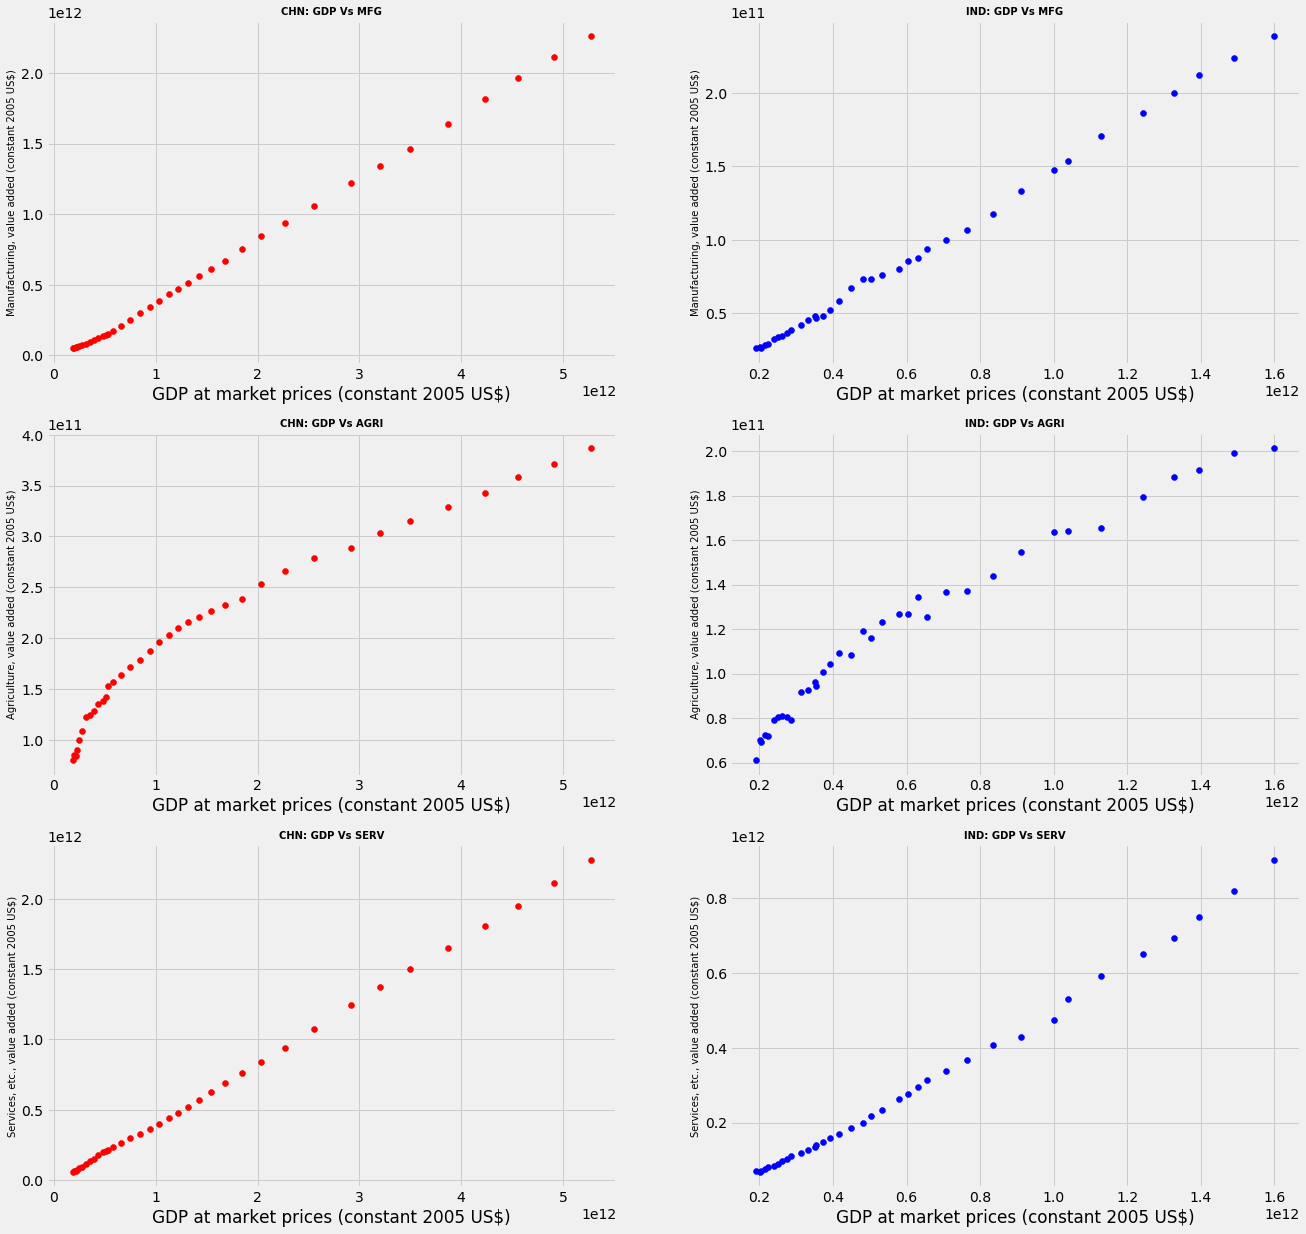

In [66]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 20)) 
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
gs = gridspec.GridSpec(3, 2)#, width_ratios=[1, 1]) 

### Plot 1 "Country 1 - GDP Vs MFG"
ax0 = plt.subplot(gs[0,0])
ax0.set_title(Country1 + ': GDP Vs MFG', fontsize=10,fontweight="bold")
#ax0.set_title('Country I: GDP Vs MFG', fontsize=10,fontweight="bold")

ax0.set_xlabel(dataGDPCR1_temp['IndicatorName'].iloc[0])
ax0.set_ylabel(dataMFGCR1_temp['IndicatorName'].iloc[0],fontsize=10)

plt.scatter(dataGDPCR1_temp['Value'].values,dataMFGCR1_temp['Value'].values, color= 'red')
#ax2.plot(dataGDPChina_temp['Value'].values,dataMFGChina_temp['Value'].values)

### Plot 2 "Country 2 - GDP Vs MFG"
ax1 = plt.subplot(gs[0,1])
ax1.set_title(Country2 + ': GDP Vs MFG', fontsize=10,fontweight="bold")
ax1.set_xlabel(dataGDPCR2_temp['IndicatorName'].iloc[0])
ax1.set_ylabel(dataMFGCR2_temp['IndicatorName'].iloc[0],fontsize=10)

plt.scatter(dataGDPCR2_temp['Value'].values,dataMFGCR2_temp['Value'].values, color= 'blue')

# ### Plot 3 "Country 1 - GDP Vs AGRI"
ax3 = plt.subplot(gs[1,0])
ax3.set_title(Country1 + ': GDP Vs AGRI', fontsize=10,fontweight="bold")
#ax3.set_title('Country I: GDP Vs AGRI', fontsize=10,fontweight="bold")
ax3.set_xlabel(dataGDPCR1_temp['IndicatorName'].iloc[0])
ax3.set_ylabel(dataAGRICR1_temp['IndicatorName'].iloc[0],fontsize=10)
plt.scatter(dataGDPCR1_temp['Value'].values,dataAGRICR1_temp['Value'].values, color= 'red')

# ### Plot 4 "Country 1 - GDP Vs AGRI"
ax4 = plt.subplot(gs[1,1])
ax4.set_title(Country2 + ': GDP Vs AGRI', fontsize=10,fontweight="bold")
#ax4.set_title('Country I: GDP Vs AGRI', fontsize=10,fontweight="bold")
ax4.set_xlabel(dataGDPCR2_temp['IndicatorName'].iloc[0])
ax4.set_ylabel(dataAGRICR2_temp['IndicatorName'].iloc[0],fontsize=10)
plt.scatter(dataGDPCR2_temp['Value'].values,dataAGRICR2_temp['Value'].values, color= 'blue')

# ### Plot 5 "Country 1 - GDP Vs SERV"
ax5 = plt.subplot(gs[2,0])
ax5.set_title(Country1 + ': GDP Vs SERV', fontsize=10,fontweight="bold")
#ax3.set_title('Country I: GDP Vs SERV', fontsize=10,fontweight="bold")
ax5.set_xlabel(dataGDPCR1_temp['IndicatorName'].iloc[0])
ax5.set_ylabel(dataSERVCR1_temp['IndicatorName'].iloc[0],fontsize=10)
plt.scatter(dataGDPCR1_temp['Value'].values,dataSERVCR1_temp['Value'].values, color= 'red')

# ### Plot 6 "Country 1 - GDP Vs SERV"
ax6 = plt.subplot(gs[2,1])
ax6.set_title(Country2 + ': GDP Vs SERV', fontsize=10,fontweight="bold")
#ax6.set_title('Country I: GDP Vs SERV', fontsize=10,fontweight="bold")
ax6.set_xlabel(dataGDPCR2_temp['IndicatorName'].iloc[0])
ax6.set_ylabel(dataSERVCR2_temp['IndicatorName'].iloc[0],fontsize=10)
plt.scatter(dataGDPCR2_temp['Value'].values,dataSERVCR2_temp['Value'].values, color= 'blue')

plt.show()

fig.savefig("GDPCorrelation.png")

In [67]:
# Country 1 - GDP Vs MFG
print('===> Country 1 - GDP Vs MFG')
print('---------------------------')
print(np.corrcoef(dataGDPCR1_temp['Value'].values,dataMFGCR1_temp['Value'].values)) 

===> Country 1 - GDP Vs MFG
---------------------------
[[1.         0.99978638]
 [0.99978638 1.        ]]


In [68]:
# Country 2: GDp Vs MFG

print('===> Country 2 - GDP Vs MFG')
print('---------------------------')

print(np.corrcoef(dataGDPCR2_temp['Value'].values,dataMFGCR2_temp['Value'].values))

===> Country 2 - GDP Vs MFG
---------------------------
[[1.         0.99931281]
 [0.99931281 1.        ]]


In [69]:
# Country 1 - GDP Vs AGRI

print('===> Country 1 - GDP Vs AGRI')
print('---------------------------')

print(np.corrcoef(dataGDPCR1_temp['Value'].values,dataAGRICR1_temp['Value'].values))

===> Country 1 - GDP Vs AGRI
---------------------------
[[1.         0.96831993]
 [0.96831993 1.        ]]


In [70]:
# Country 2 - GDP Vs AGRI

print('===> Country 2 - GDP Vs AGRI')
print('---------------------------')

print(np.corrcoef(dataGDPCR2_temp['Value'].values,dataAGRICR2_temp['Value'].values))

===> Country 2 - GDP Vs AGRI
---------------------------
[[1.         0.98216157]
 [0.98216157 1.        ]]


In [71]:
# Country 1 - GDP Vs SERV

print('===> Country 1 - GDP Vs SERV')
print('---------------------------')

print(np.corrcoef(dataGDPCR1_temp['Value'].values,dataSERVCR1_temp['Value'].values))

===> Country 1 - GDP Vs SERV
---------------------------
[[1.         0.99978425]
 [0.99978425 1.        ]]


In [72]:
# Country 2 - GDP Vs SERV

print('===> Country 2 - GDP Vs SERV')
print('---------------------------')

print(np.corrcoef(dataGDPCR2_temp['Value'].values,dataSERVCR2_temp['Value'].values))

===> Country 2 - GDP Vs SERV
---------------------------
[[1.        0.9978766]
 [0.9978766 1.       ]]


# Comparing the contribution of mfg,service and agri in GDP of China vs India

In [73]:
SummaryGDP = dataset[mask2 & mask3 & mask1]



In [74]:
# YR, BRICS, Rest of Indicator (MFG,SERV,AGRI)
SummaryROI = dataset[mask2 & mask3 & (mask4 | mask5 |mask6)]

In [75]:
SummaryGDP.shape, SummaryROI.shape

((24, 6), (65, 6))

In [76]:
SummaryROI['IndicatorName'].unique(), SummaryROI['Year'].unique()

(array(['Agriculture, value added (constant 2005 US$)',
        'Manufacturing, value added (constant 2005 US$)',
        'Services, etc., value added (constant 2005 US$)'], dtype=object),
 array([1980, 1990, 2000, 2010, 2014], dtype=int64))

In [77]:
SummaryGDP['IndicatorName'].unique(), SummaryGDP['Year'].unique()

(array(['GDP at market prices (constant 2005 US$)'], dtype=object),
 array([1980, 1990, 2000, 2010, 2014], dtype=int64))

In [78]:
Country1,Country2

('CHN', 'IND')

In [79]:
SummaryGDPCR1 = SummaryGDP[SummaryGDP['CountryCode']== Country1]
SummaryGDPCR2 = SummaryGDP[SummaryGDP['CountryCode']== Country2]

In [80]:
SummaryROICR1 = SummaryROI[SummaryROI['CountryCode']== Country1]
SummaryROICR2 = SummaryROI[SummaryROI['CountryCode']== Country2]
SummaryROICR1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1034560,China,CHN,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1980,8.400877e+10
1034757,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,6.138411e+10
1034876,China,CHN,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1980,6.754895e+10
1914641,China,CHN,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1990,1.531594e+11
1914989,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1990,1.528899e+11


In [81]:
SummaryGDPCR1 = SummaryGDP[SummaryGDP['CountryCode']== Country1]
SummaryGDPCR2 = SummaryGDP[SummaryGDP['CountryCode']== Country2]

In [82]:
SummaryROICR1 = SummaryROI[SummaryROI['CountryCode']== Country1]
SummaryROICR2 = SummaryROI[SummaryROI['CountryCode']== Country2]
SummaryROICR1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1034560,China,CHN,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1980,8.400877e+10
1034757,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1980,6.138411e+10
1034876,China,CHN,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1980,6.754895e+10
1914641,China,CHN,"Agriculture, value added (constant 2005 US$)",NV.AGR.TOTL.KD,1990,1.531594e+11
1914989,China,CHN,"Manufacturing, value added (constant 2005 US$)",NV.IND.MANF.KD,1990,1.528899e+11


In [83]:
SummaryROICR1MFG = SummaryROICR1[mask4]
SummaryROICR2MFG = SummaryROICR2[mask4]

SummaryROICR1AGRI = SummaryROICR1[mask5]
SummaryROICR2AGRI = SummaryROICR2[mask5]

SummaryROICR1SERV = SummaryROICR1[mask6]
SummaryROICR2SERV = SummaryROICR2[mask6]

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\ajamishr\AppData\Local\C

In [84]:
SummaryROICR2SERV.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1051875,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1980,7.173092e+10
1938187,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,1990,1.342344e+11
3246268,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,2000,2.755728e+11
4930029,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,2010,6.510846e+11
5585734,India,IND,"Services, etc., value added (constant 2005 US$)",NV.SRV.TETC.KD,2014,9.021431e+11


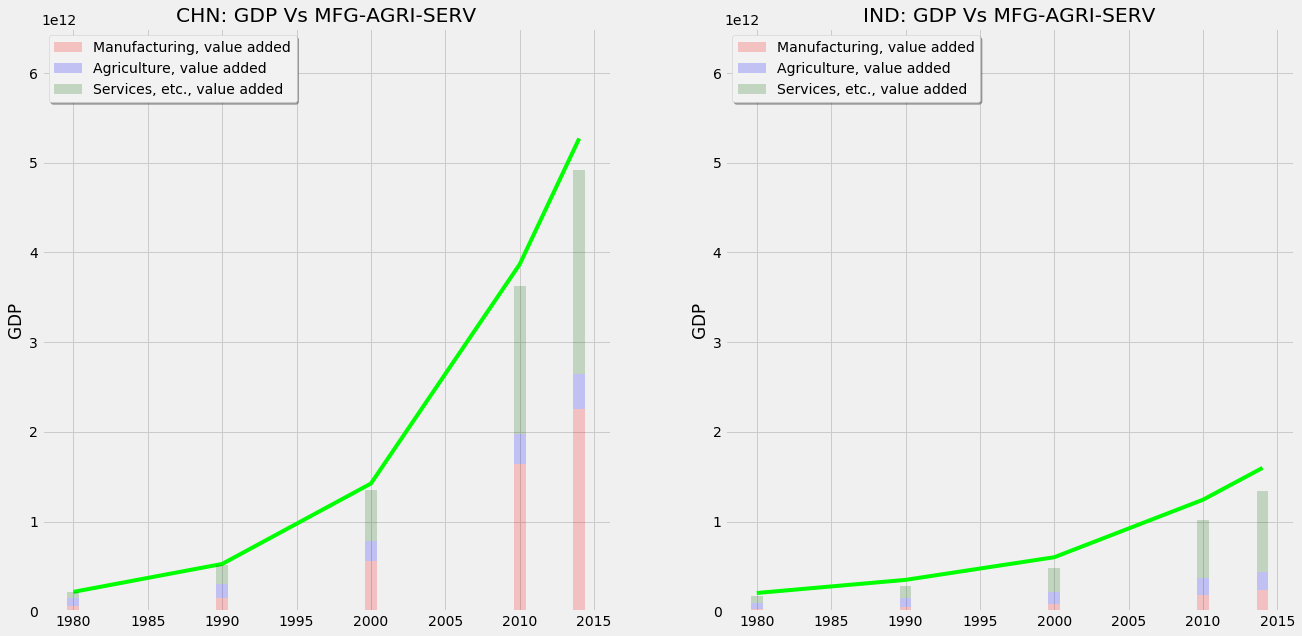

In [85]:
# 2 plots
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 10)) 
gs = gridspec.GridSpec(1, 2)#, width_ratios=[1, 1]) 

# Plot I - CHINA
ax1 = plt.subplot(gs[0,0])
######
# Country I - CHINA
#plt.rcParams['figure.figsize']=(10,8) # set the figure size
#plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
width = 0.1

#fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # set up the 2nd axis

ax1.plot( SummaryGDPCR1['Year'],SummaryGDPCR1['Value'],color='lime') #plot the Revenue on axis #1


ax2.grid(b=False) # turn off grid #2

xYear = SummaryROICR1MFG['Year'].values
yMFG  = SummaryROICR1MFG['Value'].values
vAGRI = SummaryROICR1AGRI['Value'].values
vSERV = SummaryROICR1SERV['Value'].values

p1= ax2.bar(xYear ,yMFG, alpha=0.2, color='red',label='Manufacturing, value added')
p2 = ax2.bar(xYear,vAGRI, alpha=0.2, color='blue',bottom = yMFG, label='Agriculture, value added')
p3 = ax2.bar(xYear,vSERV, alpha=0.2, color='darkgreen', bottom = vAGRI + yMFG, label='Services, etc., value added')


ax1.set_ylim(0, 6500000000000)
ax2.set_ylim(0, 6500000000000)

ax2.yaxis.set_visible(False)

ax1.set_title(Country1 +': ' + 'GDP Vs MFG-AGRI-SERV')
ax1.set_ylabel('GDP')


# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'medium'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
#plt.show()


#######
# Plot 2 INDIA
ax3 = plt.subplot(gs[0,1])
width = 0.1

#fig, ax1 = plt.subplots()
ax4 = ax3.twinx()  # set up the 2nd axis

ax3.plot( SummaryGDPCR2['Year'],SummaryGDPCR2['Value'],color='lime') #plot the Revenue on axis #1


ax4.grid(b=False) # turn off grid #2

xYear = SummaryROICR2MFG['Year'].values
yMFG  = SummaryROICR2MFG['Value'].values
vAGRI = SummaryROICR2AGRI['Value'].values
vSERV = SummaryROICR2SERV['Value'].values

p1= ax4.bar(xYear ,yMFG, alpha=0.2, color='red',label='Manufacturing, value added')
p2 = ax4.bar(xYear,vAGRI, alpha=0.2, color='blue',bottom = yMFG, label='Agriculture, value added')
p3 = ax4.bar(xYear,vSERV, alpha=0.2, color='darkgreen', bottom = vAGRI + yMFG, label='Services, etc., value added')


ax3.set_ylim(0, 6500000000000)
ax4.set_ylim(0, 6500000000000)

ax4.yaxis.set_visible(False)

ax3.set_title(Country2 +': ' + 'GDP Vs MFG-AGRI-SERV')
ax3.set_ylabel('GDP')


# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'medium'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')


plt.show()
fig.savefig("GDPCHNVsINS.png")

